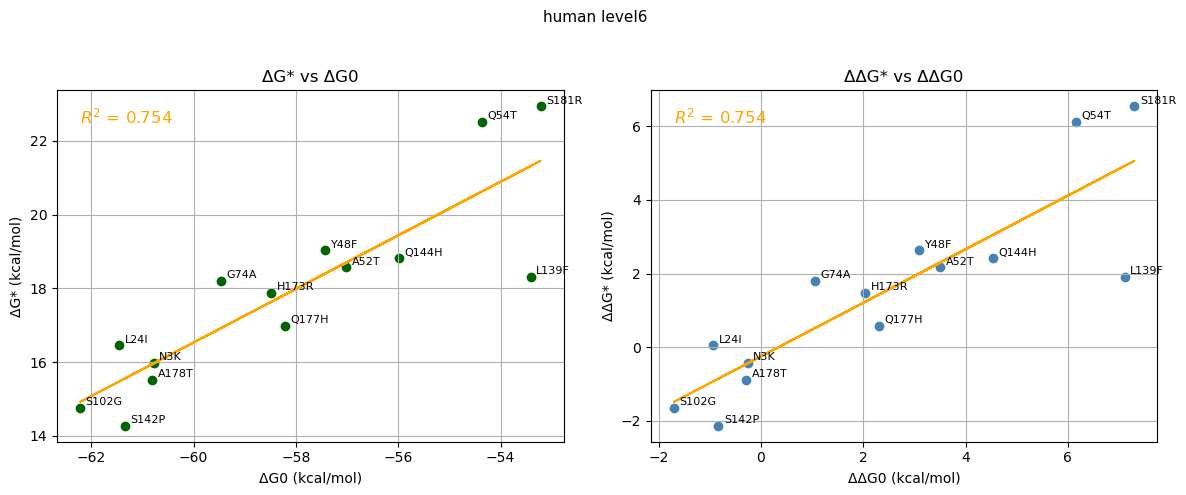

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# WT values
wt_dg_star = 16.40
wt_dg0 = -60.52

# Mutant data
mutants = [
    {"name": "Y48F",     "dg_star": 19.03, "dg0": -57.43,  "sec49_distance": 0.0,   "ca_distance": 5.47},
    {"name": "A52T",     "dg_star": 18.57, "dg0": -57.02,  "sec49_distance": 5.20,  "ca_distance": 9.62},
    {"name": "Q54T",     "dg_star": 22.51, "dg0": -54.37,  "sec49_distance": 9.50,  "ca_distance": 10.99},
    {"name": "Q177H",    "dg_star": 16.98, "dg0": -58.22,  "sec49_distance": 14.00, "ca_distance": 15.71},
    {"name": "Q144H",    "dg_star": 18.81, "dg0": -55.99,  "sec49_distance": 12.50, "ca_distance": 9.46},
    {"name": "A178T",    "dg_star": 15.51, "dg0": -60.81,  "sec49_distance": 14.77, "ca_distance": 18.99},
    {"name": "G74A",     "dg_star": 18.20, "dg0": -59.47,  "sec49_distance": 14.29, "ca_distance": 21.53},
    {"name": "L139F",    "dg_star": 18.30, "dg0": -53.41,  "sec49_distance": 16.44, "ca_distance": 12.51},
    {"name": "S142P",    "dg_star": 14.27, "dg0": -61.35,  "sec49_distance": 16.77, "ca_distance": 19.14},
    {"name": "N3K",      "dg_star": 15.97, "dg0": -60.78,  "sec49_distance": 19.05, "ca_distance": 22.80},
    {"name": "L24I",     "dg_star": 16.45, "dg0": -61.45,  "sec49_distance": 19.64, "ca_distance": 22.97},
    {"name": "S102G",    "dg_star": 14.75, "dg0": -62.22,  "sec49_distance": 20.00, "ca_distance": 21.53},
    {"name": "S181R",    "dg_star": 22.94, "dg0": -53.22,  "sec49_distance": 20.00, "ca_distance": 21.53},
    {"name": "H173R",    "dg_star": 17.88, "dg0": -58.48,    "sec49_distance": 20.00, "ca_distance": 21.53},
]

mutants = [
    {"name": "Y48F",     "dg_star": 15.06,  "dg0": -60.82,   "sec49_distance": 0.0,   "ca_distance": 5.47},
    {"name": "A52T",     "dg_star": 14.82,  "dg0": -61.63,   "sec49_distance": 5.20,  "ca_distance": 9.62},
    {"name": "Q54T",     "dg_star": 23.97,  "dg0": -53.03,   "sec49_distance": 9.50,  "ca_distance": 10.99},
    {"name": "Q177H",    "dg_star": 23.76,  "dg0": -53.02,   "sec49_distance": 14.00, "ca_distance": 15.71},
    {"name": "Q144H",    "dg_star": 19.87,  "dg0": -56.48,   "sec49_distance": 12.50, "ca_distance": 9.46},
    {"name": "A178T",    "dg_star": 19.18,  "dg0": -56.19,   "sec49_distance": 14.77, "ca_distance": 18.99},
    {"name": "G74A",     "dg_star": None,   "dg0": None,     "sec49_distance": 14.29, "ca_distance": 21.53},
    {"name": "L139F",    "dg_star": 14.07,  "dg0": -63.47,   "sec49_distance": 16.44, "ca_distance": 12.51},
    {"name": "N3K",      "dg_star": None,   "dg0": None,     "sec49_distance": 19.05, "ca_distance": 22.80},
    {"name": "L24I",     "dg_star": 19.00,  "dg0": -57.16,   "sec49_distance": 19.64, "ca_distance": 22.97},
    {"name": "S102G",    "dg_star": 14.63,  "dg0": -60.62,   "sec49_distance": 20.00, "ca_distance": 21.53},
    {"name": "S181R",    "dg_star": 19.94,  "dg0": -57.00,   "sec49_distance": 20.00, "ca_distance": 21.53},
    {"name": "H173R",    "dg_star": None,   "dg0": None,     "sec49_distance": 20.00, "ca_distance": 21.53},
]


# Extract values
dg0 = [m["dg0"] for m in mutants]
dg_star = [m["dg_star"] for m in mutants]
labels = [m["name"] for m in mutants]

# ΔΔG and ΔΔG*
ddg = [dg - wt_dg0 for dg in dg0]
ddg_star = [dg - wt_dg_star for dg in dg_star]

plt.figure(figsize=(12, 5))

# Plot 1: ΔG* vs ΔG0 with fit line and R²
plt.subplot(1, 2, 1)
plt.scatter(dg0, dg_star, color='darkgreen')
slope, intercept, r_value, p_value, std_err = linregress(dg0, dg_star)
plt.plot(dg0, [slope*x + intercept for x in dg0], color='orange')
for i, label in enumerate(labels):
    plt.annotate(label, (dg0[i], dg_star[i]), fontsize=8, xytext=(4, 2), textcoords='offset points')
plt.xlabel("ΔG0 (kcal/mol)")
plt.ylabel("ΔG* (kcal/mol)")
plt.title("ΔG* vs ΔG0")
plt.grid(True)
plt.text(min(dg0), max(dg_star), f'$R^2$ = {r_value**2:.3f}', color='orange', fontsize=12, verticalalignment='top')

# Plot 2: ΔΔG* vs ΔΔG with fit line and R²
plt.subplot(1, 2, 2)
plt.scatter(ddg, ddg_star, color='steelblue')
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(ddg, ddg_star)
plt.plot(ddg, [slope2*x + intercept2 for x in ddg], color='orange')
for i, label in enumerate(labels):
    plt.annotate(label, (ddg[i], ddg_star[i]), fontsize=8, xytext=(4, 2), textcoords='offset points')
plt.xlabel("ΔΔG0 (kcal/mol)")
plt.ylabel("ΔΔG* (kcal/mol)")
plt.title("ΔΔG* vs ΔΔG0")
plt.grid(True)
plt.text(min(ddg), max(ddg_star), f'$R^2$ = {r_value2**2:.3f}', color='orange', fontsize=12, verticalalignment='top')

plt.suptitle("human level6", fontsize=11)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure
save_path = "/home/hp/nayanika/github/GPX6/figures"
os.makedirs(save_path, exist_ok=True)
plt.savefig(f"{save_path}/level6human.png", dpi=300)

plt.show()
